In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

Text(0.5, 1.0, 'グラフ1 : 二項分布')

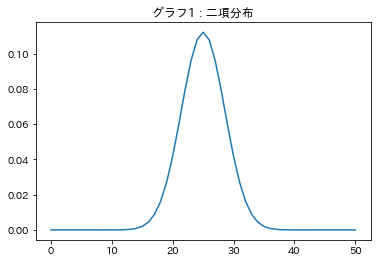

In [2]:
# 二項分布のグラフ
def binominal_dist(n, k, p):
    """
    二項分布
    :param n: n
    :param k: k
    :param p: 確率
    :return: 二項分布
    """
    x = (p ** k) * ((1 - p) ** (n - k))
    y = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return x * y


n = 50
points = np.array([binominal_dist(n, k, 0.5) for k in range(n + 1)])
plt.plot(points)
plt.title('グラフ1 : 二項分布')

In [3]:
np.random.random([3, 7]) < 0.65

array([[ True,  True, False, False,  True, False, False],
       [False, False, False, False, False,  True,  True],
       [False,  True, False,  True,  True,  True,  True]])

In [4]:
(np.random.random([3, 7]) < 0.65).sum(axis=1) >= 4

array([False,  True,  True])

In [5]:
n_trial = 1000000
n_battle = 7
win7 = ((np.random.random([n_trial, n_battle]) < 0.65).sum(axis=1) >= int(n_battle / 2) + 1).sum()
win7 / n_trial

0.800022

In [6]:
n = 5
k = 3
math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

10.0

In [7]:
def binominal_dist(k, n, p):
    """
    二項分布
    :param k: k
    :param n: n
    :param p: 確率
    :return: 二項分布
    """
    c = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return c * (p ** k) * ((1 - p) ** (n - k))


win7 = 0

# 七番勝負の勝率は4〜7勝する確率の合算
for i in range(4, 8):
    win7 += binominal_dist(i, 7, 0.65)

win5 = 0

# 五番勝負の勝率は3〜5勝する確率の合算
for i in range(3, 6):
    win5 += binominal_dist(i, 5, 0.65)

pd.DataFrame([[win7], [win5]], index=['七番勝負', '五番勝負'], columns=['勝率'])

,勝率
七番勝負,0.800154
五番勝負,0.764831


In [8]:
from scipy.stats import binom

win7 = 0

for i in range(4, 8):
    win7 += binom.pmf(i, 7, 0.65)

win7

0.800154265625

In [9]:
# 正解例

def binominal_dist2(k, n, p):
    """
    二項分布 (正規分布使用)
    :param k: k
    :param n: n
    :param p: 確率
    :return: 二項分布
    """
    x1 = 1
    x2 = np.sqrt(2 * np.pi * n * p * (1 - p))
    y1 = -1 * ((k - n * p) ** 2)
    y2 = 2 * n * p * (1 - p)
    return (x1 / x2) * np.exp(y1 / y2)


# 七番勝負の勝率は4〜7勝する確率の合算
win7 = 0

for i in range(4, 8):
    win7 += binominal_dist2(i, 7, 0.65)

# 五番勝負の勝率は3〜5勝する確率の合算
win5 = 0

for i in range(3, 6):
    win5 += binominal_dist2(i, 5, 0.65)

pd.DataFrame([[win7], [win5]], index=['七番勝負', '五番勝負'], columns=['勝率'])

,勝率
七番勝負,0.795540
五番勝負,0.753376
